### Problem statement

Write a computer program capable of reducing the number of intensity levels in a image from 256 to 2, in integer powers of 2.  
The desired number of intensity levels need to be a variable input to your programme.  

Hint: 
8 bit --------> 0-255 ----------> 2 bits  
intensity levels should be desired variable input.  
round-off(x/255)*255 -> two levels

In [2]:
# importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

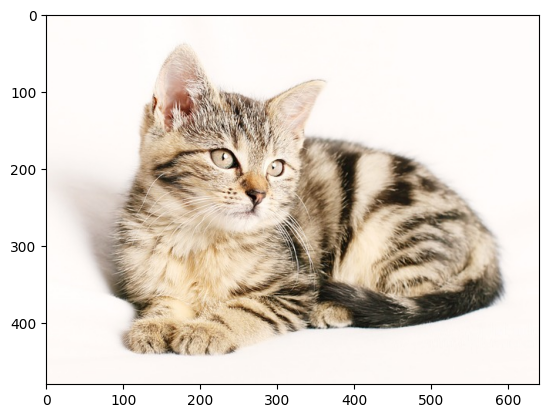

In [14]:
# load the image
image = cv2.imread('../assets/cat_640.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [20]:
def quantize(value: int, n: int) -> int:
    """ Quantize a value to n bits. """

    # convert value to n bit scale
    x = round(((value + 1) / 256) * (2 ** n))

    # convert n bit scale to 256 scale
    x = round(((x / (2 ** n)) * 256) - 1)

    # handling -1 case
    return x if x > 0 else 0


In [24]:
def reduce_intensity(intensity: int):
    """ Reduce the intensity of an image to n bits and display """

    # intensity value must be between 1 and 8
    if intensity < 1 or intensity > 8:
        raise ValueError("Intensity must be between 1 and 8")

    reduced_image = [[[quantize(value, intensity) for value in pixel]for pixel in row] for row in image]
    plt.imshow(reduced_image)
    plt.show()

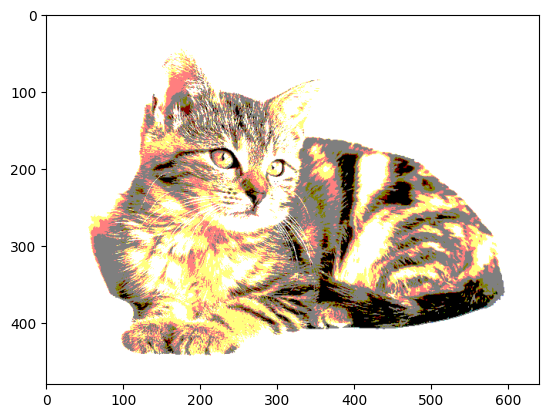

In [23]:
reduce_intensity(1)

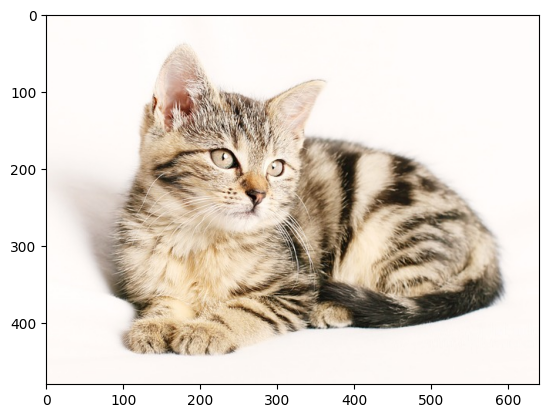

In [25]:
# should output the original image
reduce_intensity(8)

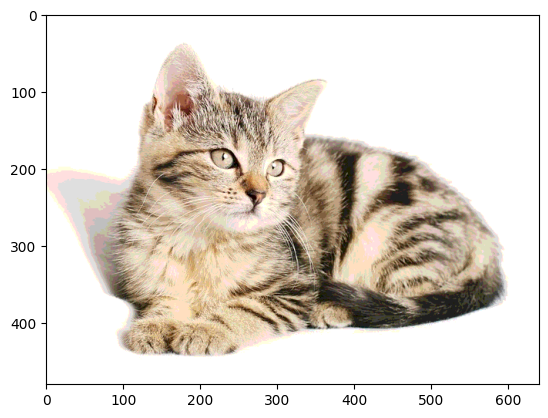

In [27]:
reduce_intensity(3)